In [1]:
# Import important libraries
import numpy as np
import pandas as pd

# Import important libraries visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Library to ignore warnings
import warnings
warnings.filterwarnings

pd.set_option('display.max_columns',None)

# Import libraries for handling categorical data
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import uniform

# Import libraries to handle scaling
from sklearn.preprocessing import MinMaxScaler

# Libraries to split data into Train and Test Data
from sklearn.model_selection import train_test_split

# Libraries to evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import models algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV


C:\Users\PRATIK KALE\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#pip install mysql-connector-python


In [3]:
#pip install pymysql


In [4]:
import mysql.connector
import pandas as pd

In [5]:
connection = mysql.connector.connect(host='18.136.157.135',
                                    user='dm_team3',
                                    password='DM!$!Team!27@9!20&',
                                    database='project_telecom',
                                    auth_plugin='mysql_native_password')

In [6]:
database = "select * from  telecom_churn_data"
data = pd.read_sql(database,connection)
data

C:\Users\PRATIK KALE\AppData\Local\Temp\ipykernel_13640\1310219391.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(database,connection)


,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,columns11,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [7]:
data.shape

(4617, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   columns1   4617 non-null   object
 1   columns2   4617 non-null   object
 2   columns3   4617 non-null   object
 3   columns4   4617 non-null   object
 4   columns5   4617 non-null   object
 5   columns6   4617 non-null   object
 6   columns7   4617 non-null   object
 7   columns8   4617 non-null   object
 8   columns9   4617 non-null   object
 9   columns10  4617 non-null   object
 10  columns11  4617 non-null   object
 11  columns12  4617 non-null   object
 12  columns13  4617 non-null   object
 13  columns14  4617 non-null   object
 14  columns15  4617 non-null   object
 15  columns16  4617 non-null   object
 16  columns17  4617 non-null   object
 17  columns18  4617 non-null   object
 18  columns19  4617 non-null   object
 19  columns20  4617 non-null   object
 20  columns21  4617 non-null   obj

In [9]:
new_column_names = ['State', 'Account_Length', 'Area_Code', 'Phone',
'International_Plan', 'VMail_Plan', 'VMail_Message',
'Day_Mins', 'Day_Calls', 'Day_Charge',
'Eve_Mins', 'Eve_Calls', 'Eve_Charge',
'Night_Mins', 'Night_Calls', 'Night_Charge',
'International_Mins', 'International_calls',
'International_Charge', 'CustServ_Calls', 'Churn']

In [10]:
data.columns=new_column_names

In [11]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'Phone', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [12]:
data.drop('Phone',axis=1,inplace=True)

In [13]:
data.columns

Index(['State', 'Account_Length', 'Area_Code', 'International_Plan',
       'VMail_Plan', 'VMail_Message', 'Day_Mins', 'Day_Calls', 'Day_Charge',
       'Eve_Mins', 'Eve_Calls', 'Eve_Charge', 'Night_Mins', 'Night_Calls',
       'Night_Charge', 'International_Mins', 'International_calls',
       'International_Charge', 'CustServ_Calls', 'Churn'],
      dtype='object')

In [14]:
data.nunique()

State                     51
Account_Length           218
Area_Code                  3
International_Plan         2
VMail_Plan                 2
VMail_Message             47
Day_Mins                1901
Day_Calls                123
Day_Charge              1901
Eve_Mins                1833
Eve_Calls                125
Eve_Charge              1621
Night_Mins              1813
Night_Calls              130
Night_Charge            1012
International_Mins       168
International_calls       21
International_Charge     168
CustServ_Calls            10
Churn                      2
dtype: int64

In [15]:
for i in data:
    print(data[i].value_counts())

State
WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: count, dtype: int64
Account_Length
90     63
87     56
105    54
93     54
112    53
       ..
200     1
2       1
215     1
199     1
233     1
Name: count, Length: 218, dtype: int64
Area_Code
415    2299
408    1161
510    1157
Name: count, dtype: int64
International_Plan
no     4171
yes     446
Name: count, dtype: int64
VMail_Plan
no     3381
yes    1236
Name: count, dtype: int64
VMail_Message
0     3381
31      80
29      64
28      62
33      61
24      57
27      57
2

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   object
 1   Account_Length        4617 non-null   object
 2   Area_Code             4617 non-null   object
 3   International_Plan    4617 non-null   object
 4   VMail_Plan            4617 non-null   object
 5   VMail_Message         4617 non-null   object
 6   Day_Mins              4617 non-null   object
 7   Day_Calls             4617 non-null   object
 8   Day_Charge            4617 non-null   object
 9   Eve_Mins              4617 non-null   object
 10  Eve_Calls             4617 non-null   object
 11  Eve_Charge            4617 non-null   object
 12  Night_Mins            4617 non-null   object
 13  Night_Calls           4617 non-null   object
 14  Night_Charge          4617 non-null   object
 15  International_Mins    4617 non-null   

In [17]:
data

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.9,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,no,yes,25,144,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,no,yes,29,189,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [18]:
data.isnull().sum()

State                   0
Account_Length          0
Area_Code               0
International_Plan      0
VMail_Plan              0
VMail_Message           0
Day_Mins                0
Day_Calls               0
Day_Charge              0
Eve_Mins                0
Eve_Calls               0
Eve_Charge              0
Night_Mins              0
Night_Calls             0
Night_Charge            0
International_Mins      0
International_calls     0
International_Charge    0
CustServ_Calls          0
Churn                   0
dtype: int64

## Converting objects into numeric values

### State

In [19]:
data.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [20]:
len(data.State.unique())

51

In [21]:
print(data['State'].value_counts())

State
WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: count, dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
LE=LabelEncoder()
data['State']=LE.fit_transform(data.State)

In [24]:
data['State']

0       16
1       35
2       31
3       35
4       36
        ..
4612    34
4613    32
4614    46
4615    22
4616    15
Name: State, Length: 4617, dtype: int32

### Account_Length          

In [25]:
data.Account_Length

0       128
1       107
2       137
3        84
4        75
       ... 
4612     57
4613    177
4614     67
4615     98
4616    140
Name: Account_Length, Length: 4617, dtype: object

### converting object to numeric value

In [26]:
data.Account_Length=data.Account_Length.astype('int16')

In [27]:
data.Account_Length

0       128
1       107
2       137
3        84
4        75
       ... 
4612     57
4613    177
4614     67
4615     98
4616    140
Name: Account_Length, Length: 4617, dtype: int16

### Area_Code

In [28]:
data.Area_Code=data.Area_Code.astype('int16')
data.Area_Code

0       415
1       415
2       415
3       408
4       415
       ... 
4612    510
4613    408
4614    408
4615    415
4616    415
Name: Area_Code, Length: 4617, dtype: int16

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State                 4617 non-null   int32 
 1   Account_Length        4617 non-null   int16 
 2   Area_Code             4617 non-null   int16 
 3   International_Plan    4617 non-null   object
 4   VMail_Plan            4617 non-null   object
 5   VMail_Message         4617 non-null   object
 6   Day_Mins              4617 non-null   object
 7   Day_Calls             4617 non-null   object
 8   Day_Charge            4617 non-null   object
 9   Eve_Mins              4617 non-null   object
 10  Eve_Calls             4617 non-null   object
 11  Eve_Charge            4617 non-null   object
 12  Night_Mins            4617 non-null   object
 13  Night_Calls           4617 non-null   object
 14  Night_Charge          4617 non-null   object
 15  International_Mins    4617 non-null   

In [30]:
data.International_Plan

0         no
1         no
2         no
3        yes
4        yes
        ... 
4612      no
4613      no
4614      no
4615      no
4616      no
Name: International_Plan, Length: 4617, dtype: object

In [31]:
data.International_Plan=LE.fit_transform(data.International_Plan)

In [32]:
data.International_Plan    

0       0
1       0
2       0
3       1
4       1
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: International_Plan, Length: 4617, dtype: int32

In [33]:
data.VMail_Plan.unique()

array([' yes', ' no'], dtype=object)

In [34]:
data.VMail_Plan=LE.fit_transform(data.VMail_Plan)

In [35]:
data.VMail_Plan.value_counts()

VMail_Plan
0    3381
1    1236
Name: count, dtype: int64

In [36]:
data.VMail_Message=data.VMail_Message.astype('int16')

In [37]:
data.VMail_Message         

0       25
1       26
2        0
3        0
4        0
        ..
4612    25
4613    29
4614    33
4615    23
4616     0
Name: VMail_Message, Length: 4617, dtype: int16

In [38]:
data.Day_Mins=data.Day_Mins.astype('float16')

In [39]:
data.Day_Mins              

0       265.000
1       161.625
2       243.375
3       299.500
4       166.750
         ...   
4612    144.000
4613    189.000
4614    127.500
4615    168.875
4616    204.750
Name: Day_Mins, Length: 4617, dtype: float16

In [40]:
data.Day_Calls=data.Day_Calls.astype('int16')

In [41]:
data.Day_Calls             

0       110
1       123
2       114
3        71
4       113
       ... 
4612     81
4613     91
4614    126
4615     98
4616    100
Name: Day_Calls, Length: 4617, dtype: int16

In [42]:
data.Day_Charge=data.Day_Charge.astype('float16')

In [43]:
data.Day_Charge            

0       45.062500
1       27.468750
2       41.375000
3       50.906250
4       28.343750
          ...    
4612    24.484375
4613    32.125000
4614    21.687500
4615    28.703125
4616    34.812500
Name: Day_Charge, Length: 4617, dtype: float16

In [44]:
data.Eve_Mins=data.Eve_Mins.astype('float16')             

In [45]:
data.Eve_Mins              

0       197.37500
1       195.50000
2       121.18750
3        61.90625
4       148.25000
          ...    
4612    187.25000
4613    303.00000
4614    296.00000
4615    226.25000
4616    126.81250
Name: Eve_Mins, Length: 4617, dtype: float16

In [46]:
data.Eve_Calls=data.Eve_Calls.astype('int16')             

In [47]:
data.Eve_Calls             

0        99
1       103
2       110
3        88
4       122
       ... 
4612    112
4613     96
4614    129
4615    117
4616    107
Name: Eve_Calls, Length: 4617, dtype: int16

In [48]:
data.Eve_Charge=data.Eve_Charge.astype('float16')

In [49]:
data.Eve_Charge            

0       16.781250
1       16.625000
2       10.296875
3        5.261719
4       12.609375
          ...    
4612    15.906250
4613    25.765625
4614    25.171875
4615    19.234375
4616    10.781250
Name: Eve_Charge, Length: 4617, dtype: float16

In [50]:
data.Night_Mins=data.Night_Mins.astype('float16')            

In [51]:
data.Night_Mins            

0       244.750
1       254.375
2       162.625
3       196.875
4       186.875
         ...   
4612    158.625
4613    163.625
4614    200.875
4615    165.500
4616    202.750
Name: Night_Mins, Length: 4617, dtype: float16

In [52]:
data.Night_Calls=data.Night_Calls.astype('int16')           

In [53]:
data.Night_Calls           

0        91
1       103
2       104
3        89
4       121
       ... 
4612    122
4613    116
4614     91
4615     96
4616    115
Name: Night_Calls, Length: 4617, dtype: int16

In [54]:
data.Night_Charge=data.Night_Charge.astype('float16')

In [55]:
data.Night_Charge

0       11.007812
1       11.453125
2        7.320312
3        8.859375
4        8.406250
          ...    
4612     7.140625
4613     7.359375
4614     9.039062
4615     7.449219
4616     9.132812
Name: Night_Charge, Length: 4617, dtype: float16

In [56]:
data.International_Mins=data.International_Mins.astype('float16')

In [57]:
data.International_Mins    

0       10.000000
1       13.703125
2       12.203125
3        6.601562
4       10.101562
          ...    
4612     8.500000
4613    15.703125
4614    13.000000
4615    14.296875
4616    12.101562
Name: International_Mins, Length: 4617, dtype: float16

In [58]:
data.International_calls=data.International_calls.astype('int16')   

In [59]:
data.International_calls   

0       3
1       3
2       5
3       7
4       3
       ..
4612    6
4613    1
4614    3
4615    3
4616    4
Name: International_calls, Length: 4617, dtype: int16

In [60]:
data.International_Charge=data.International_Charge.astype('float16') 

In [61]:
data.International_Charge  

0       2.699219
1       3.699219
2       3.289062
3       1.780273
4       2.730469
          ...   
4612    2.300781
4613    4.238281
4614    3.509766
4615    3.859375
4616    3.269531
Name: International_Charge, Length: 4617, dtype: float16

In [62]:
data.CustServ_Calls=data.CustServ_Calls.astype('int16')

In [63]:
data.CustServ_Calls        

0       1
1       1
2       0
3       2
4       3
       ..
4612    3
4613    3
4614    1
4615    0
4616    2
Name: CustServ_Calls, Length: 4617, dtype: int16

In [64]:
data.Churn.value_counts()                 

Churn
False.    3961
True.      656
Name: count, dtype: int64

In [65]:
data.Churn=LE.fit_transform(data.Churn)

In [66]:
data.Churn.value_counts()                 

Churn
0    3961
1     656
Name: count, dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   int32  
 1   Account_Length        4617 non-null   int16  
 2   Area_Code             4617 non-null   int16  
 3   International_Plan    4617 non-null   int32  
 4   VMail_Plan            4617 non-null   int32  
 5   VMail_Message         4617 non-null   int16  
 6   Day_Mins              4617 non-null   float16
 7   Day_Calls             4617 non-null   int16  
 8   Day_Charge            4617 non-null   float16
 9   Eve_Mins              4617 non-null   float16
 10  Eve_Calls             4617 non-null   int16  
 11  Eve_Charge            4617 non-null   float16
 12  Night_Mins            4617 non-null   float16
 13  Night_Calls           4617 non-null   int16  
 14  Night_Charge          4617 non-null   float16
 15  International_Mins   

In [68]:
# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']


In [69]:
import pandas as pd

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

outlier_indices = []

# Loop through each integer column
for col in X.select_dtypes(include=['int']).columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = (X[col] < lower_bound) | (X[col] > upper_bound)
    # Get the indices of outliers
    outlier_indices.extend(X.index[outliers].tolist())

print("Indices of outliers:", outlier_indices)


Indices of outliers: [3, 4, 5, 7, 9, 38, 41, 66, 67, 81, 115, 135, 144, 147, 180, 184, 198, 211, 214, 230, 231, 234, 241, 254, 258, 269, 276, 279, 319, 351, 354, 356, 358, 360, 372, 378, 382, 383, 405, 408, 416, 425, 444, 465, 486, 491, 492, 495, 498, 502, 503, 514, 529, 542, 546, 547, 553, 567, 569, 572, 586, 601, 613, 616, 619, 626, 679, 708, 715, 716, 734, 735, 737, 749, 762, 766, 771, 773, 777, 779, 780, 781, 783, 790, 792, 797, 808, 826, 830, 837, 842, 851, 869, 877, 893, 900, 933, 957, 985, 987, 1005, 1024, 1027, 1037, 1042, 1044, 1052, 1064, 1083, 1117, 1128, 1136, 1149, 1158, 1161, 1165, 1169, 1191, 1192, 1193, 1204, 1209, 1238, 1242, 1248, 1253, 1258, 1271, 1309, 1322, 1337, 1339, 1346, 1367, 1378, 1388, 1396, 1418, 1420, 1423, 1428, 1435, 1437, 1443, 1467, 1472, 1473, 1483, 1484, 1503, 1531, 1533, 1537, 1539, 1542, 1574, 1588, 1593, 1601, 1602, 1610, 1617, 1641, 1651, 1653, 1662, 1674, 1711, 1718, 1752, 1754, 1755, 1756, 1757, 1768, 1773, 1784, 1804, 1812, 1837, 1845, 1848, 1

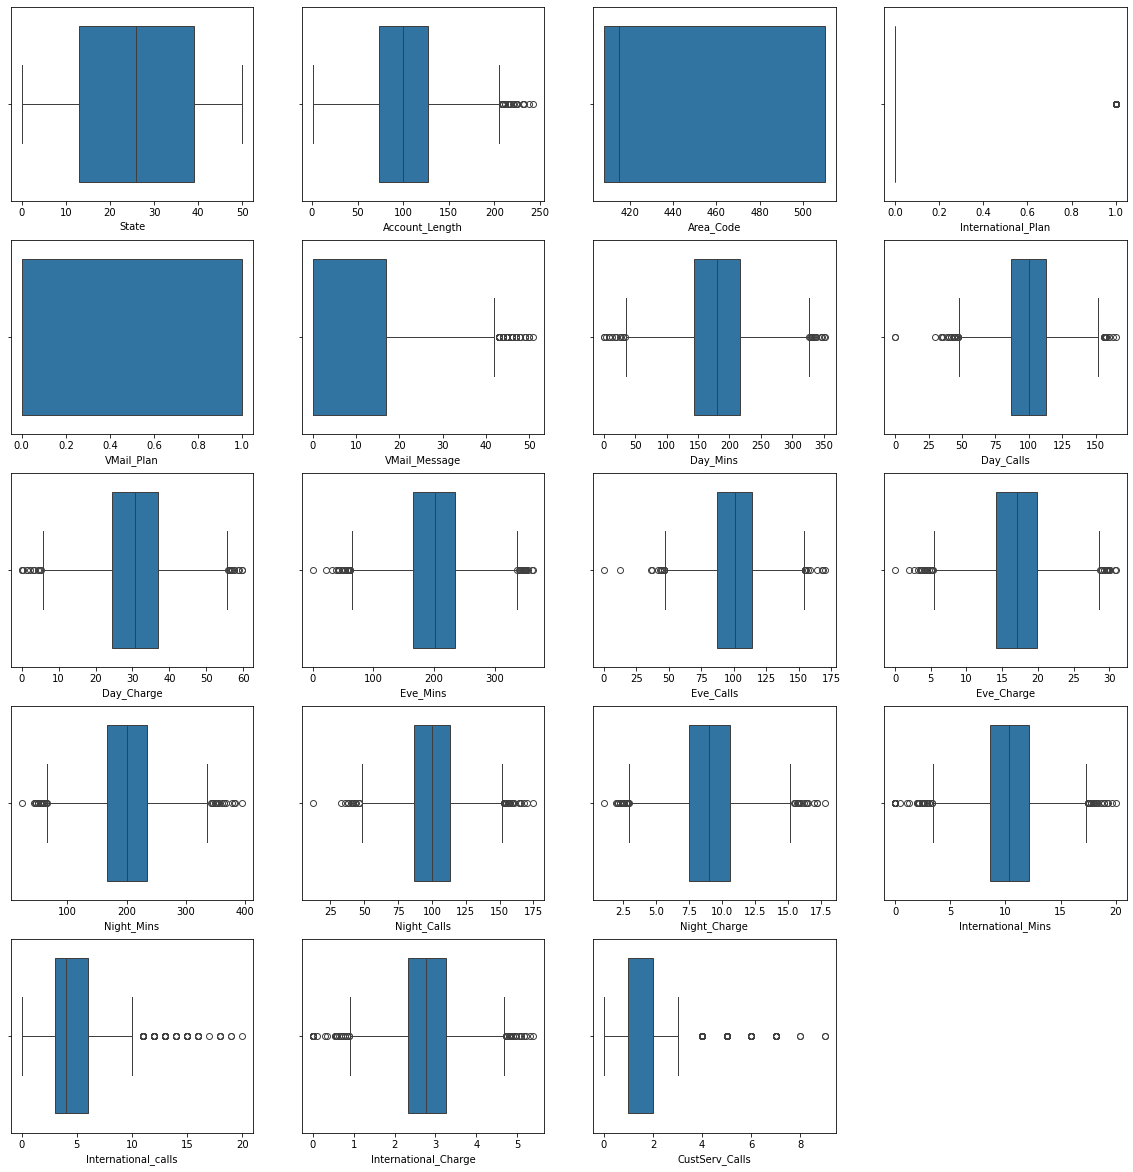

In [70]:
plt.figure(figsize=(20,25))
plotnumber=1

for i in X:
    plt.subplot(6,4,plotnumber)
    sns.boxplot(x=X[i])
    plotnumber+=1

In [71]:
import pandas as pd

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

# Loop through each integer column
for col in X.select_dtypes(include=['int']).columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = (X[col] < lower_bound) | (X[col] > upper_bound)
    # Replace outliers with median value of the column
    median_val = X[col].median()
    X.loc[outliers, col] = median_val

# Now df contains treated outliers using the IQR method


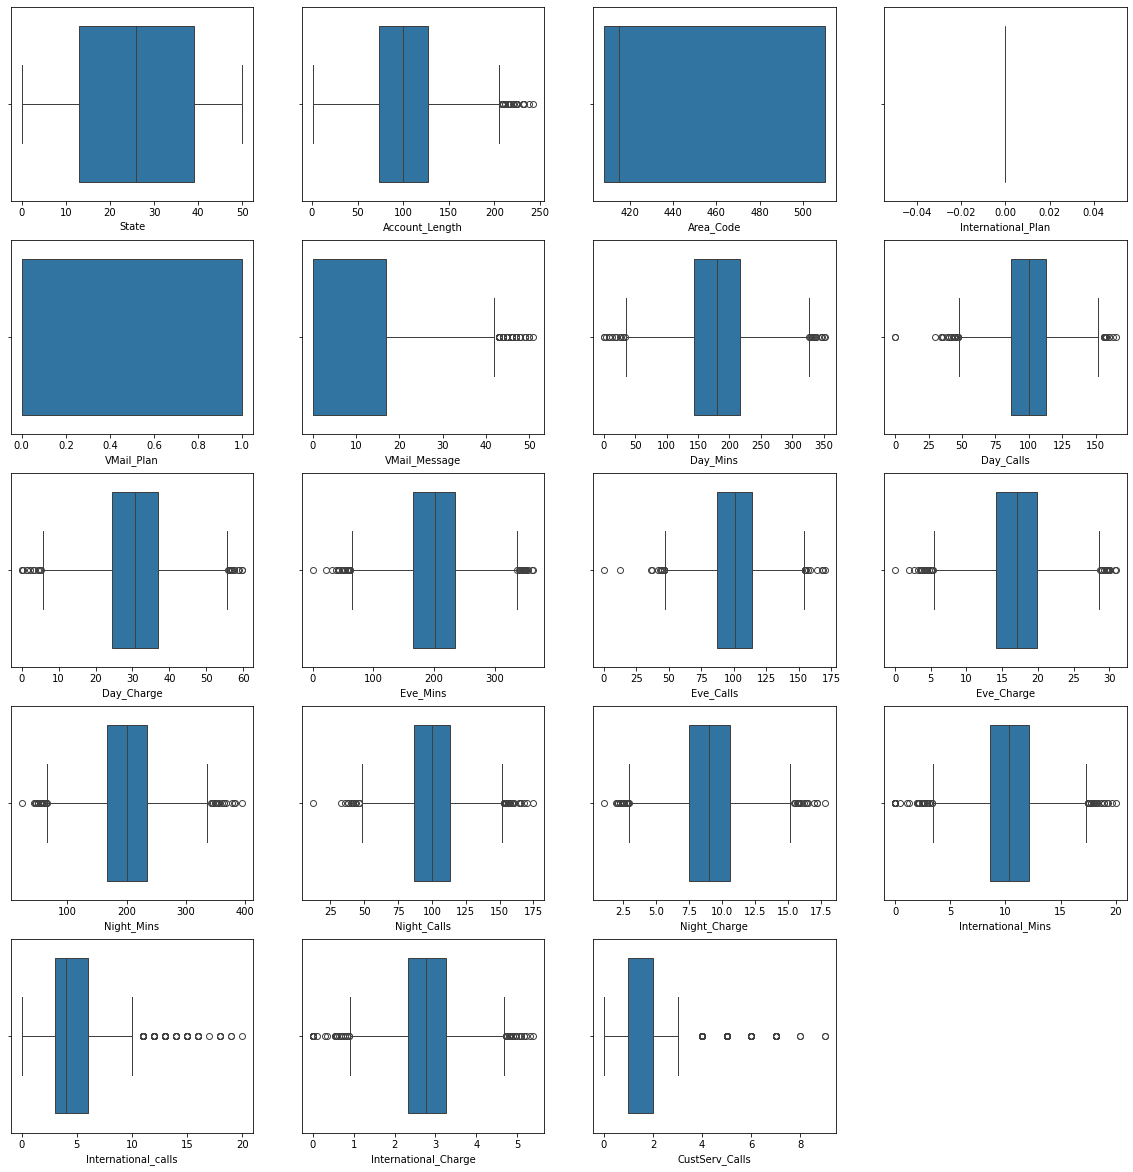

In [72]:
plt.figure(figsize=(20,25))
plotnumber=1

for i in X:
    plt.subplot(6,4,plotnumber)
    sns.boxplot(x=X[i])
    plotnumber+=1

In [73]:
X

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
0,16,128,415,0,1,25,265.000,110,45.062500,197.37500,99,16.781250,244.750,91,11.007812,10.000000,3,2.699219,1
1,35,107,415,0,1,26,161.625,123,27.468750,195.50000,103,16.625000,254.375,103,11.453125,13.703125,3,3.699219,1
2,31,137,415,0,0,0,243.375,114,41.375000,121.18750,110,10.296875,162.625,104,7.320312,12.203125,5,3.289062,0
3,35,84,408,0,0,0,299.500,71,50.906250,61.90625,88,5.261719,196.875,89,8.859375,6.601562,7,1.780273,2
4,36,75,415,0,0,0,166.750,113,28.343750,148.25000,122,12.609375,186.875,121,8.406250,10.101562,3,2.730469,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,25,144.000,81,24.484375,187.25000,112,15.906250,158.625,122,7.140625,8.500000,6,2.300781,3
4613,32,177,408,0,1,29,189.000,91,32.125000,303.00000,96,25.765625,163.625,116,7.359375,15.703125,1,4.238281,3
4614,46,67,408,0,1,33,127.500,126,21.687500,296.00000,129,25.171875,200.875,91,9.039062,13.000000,3,3.509766,1
4615,22,98,415,0,1,23,168.875,98,28.703125,226.25000,117,19.234375,165.500,96,7.449219,14.296875,3,3.859375,0


In [74]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4612    0
4613    0
4614    0
4615    0
4616    0
Name: Churn, Length: 4617, dtype: int32

In [75]:
import pandas as pd

# Load your dataset
# Assuming df is your DataFrame
# df = pd.read_csv('your_dataset.csv')

outlier_indices = []

# Loop through each integer column
for col in X.select_dtypes(include=['int']).columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify outliers
    outliers = (X[col] < lower_bound) | (X[col] > upper_bound)
    # Get the indices of outliers
    outlier_indices.extend(X.index[outliers].tolist())

print("Indices of outliers:", outlier_indices)


Indices of outliers: []


In [76]:
from collections import Counter
from imblearn.over_sampling import SMOTE


# Check class distribution before balancing
print("Class distribution before balancing:", Counter(y))

Class distribution before balancing: Counter({0: 3961, 1: 656})


In [77]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled))


Class distribution after balancing: Counter({0: 3961, 1: 3961})


In [78]:
y.unique()

array([0, 1])

## droping the unwanted columns


In [79]:
X.drop(['Day_Mins', 'Eve_Mins', 'Night_Mins', 'International_Mins', 'VMail_Message'], axis=1, inplace=True)

In [80]:
X

,State,Account_Length,Area_Code,International_Plan,VMail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,International_calls,International_Charge,CustServ_Calls
0,16,128,415,0,1,110,45.062500,99,16.781250,91,11.007812,3,2.699219,1
1,35,107,415,0,1,123,27.468750,103,16.625000,103,11.453125,3,3.699219,1
2,31,137,415,0,0,114,41.375000,110,10.296875,104,7.320312,5,3.289062,0
3,35,84,408,0,0,71,50.906250,88,5.261719,89,8.859375,7,1.780273,2
4,36,75,415,0,0,113,28.343750,122,12.609375,121,8.406250,3,2.730469,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,0,1,81,24.484375,112,15.906250,122,7.140625,6,2.300781,3
4613,32,177,408,0,1,91,32.125000,96,25.765625,116,7.359375,1,4.238281,3
4614,46,67,408,0,1,126,21.687500,129,25.171875,91,9.039062,3,3.509766,1
4615,22,98,415,0,1,98,28.703125,117,19.234375,96,7.449219,3,3.859375,0


### Data Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [82]:
X_scaled

array([[-0.67900123,  0.69090094, -0.52139206, ..., -0.58348728,
        -0.10309702, -0.43388538],
       [ 0.60575838,  0.16050289, -0.52139206, ..., -0.58348728,
         1.24039544, -0.43388538],
       [ 0.33528267,  0.91821439, -0.52139206, ...,  0.23039815,
         0.68935361, -1.19906826],
       ...,
       [ 1.34956657, -0.84977911, -0.68694075, ..., -0.58348728,
         0.9858666 , -0.43388538],
       [-0.27328767, -0.06681056, -0.52139206, ..., -0.58348728,
         1.45556416, -1.19906826],
       [-0.74662015,  0.99398554, -0.52139206, ..., -0.17654456,
         0.66311352,  0.3312975 ]])

In [84]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=45)

In [85]:
X_train

array([[ 1.01147193,  0.33730224, -0.52139206, ..., -0.99042999,
         1.41620403, -0.43388538],
       [ 0.6733773 ,  0.84244324, -0.68694075, ..., -0.58348728,
        -0.10309702,  0.3312975 ],
       [-1.01709586,  0.26153109, -0.68694075, ..., -0.17654456,
         0.66311352, -0.43388538],
       ...,
       [-0.74662015,  0.31204519, -0.52139206, ..., -0.99042999,
        -1.04249215, -0.43388538],
       [-0.27328767, -0.97606436, -0.52139206, ..., -1.3973727 ,
         0.68935361, -0.43388538],
       [ 1.07909086,  0.66564389, -0.52139206, ..., -0.17654456,
         1.71271701,  1.09648038]])

In [86]:
X_test

array([[ 1.41718549,  0.13524584, -0.52139206, ..., -0.99042999,
        -0.46521023,  0.3312975 ],
       [-1.21995264,  2.08003868, -0.52139206, ..., -0.99042999,
        -0.57279458,  0.3312975 ],
       [ 1.34956657, -0.19309581,  1.72534016, ...,  0.23039815,
        -0.31826574,  0.3312975 ],
       ...,
       [ 1.14670979, -0.54669451, -0.52139206, ..., -0.17654456,
         0.9858666 , -0.43388538],
       [ 1.21432871,  0.10998879, -0.52139206, ..., -0.58348728,
        -0.7879633 ,  0.3312975 ],
       [ 1.28194764,  0.36255929, -0.52139206, ..., -1.80431542,
        -3.72947708,  1.09648038]])

In [87]:
y_train

575     0
3877    0
2441    0
4467    0
4414    0
       ..
3704    0
4473    0
580     1
163     0
3616    1
Name: Churn, Length: 3693, dtype: int32

In [88]:
y_test

3544    0
2409    0
1700    0
2976    0
2944    0
       ..
93      0
1653    1
1796    0
1453    0
1400    0
Name: Churn, Length: 924, dtype: int32

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score

In [90]:
def evaluate_model(true, predicted):
    # Compute evaluation metrics
    confusion_mat = confusion_matrix(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    class_report = classification_report(true, predicted)
    f1 = f1_score(true, predicted)

    return confusion_mat, accuracy, precision, class_report, f1

In [91]:
models ={
    'LogisticRegression' : LogisticRegression(),
    'RandomForestClassifier' : RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'GaussianNB': GaussianNB(),
    'XGBClassifier': XGBClassifier()
}

model_list = []
f1_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset   confusion_mat, accuracy, precision, class_report, f1
    model_train_confusion_mat, model_train_accuracy, model_train_precision, model_train_class_report, model_train_f1 = evaluate_model(y_train, y_train_pred)

    model_test_confusion_mat, model_test_accuracy, model_test_precision, model_test_class_report, model_test_f1 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- confusion_matrix:\n", model_train_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_train_accuracy))
    print("- precision_score: {:.4f}".format(model_train_precision))
    print("- classification_report:\n", model_train_class_report)
    print("- f1_score: {:.4f}".format(model_train_f1))
    print('----------------------------------')

    print('Model performance for Test set')
    print("- confusion_matrix:\n", model_test_confusion_mat)
    print("- accuracy_score: {:.4f}".format(model_test_accuracy))
    print("- precision_score: {:.4f}".format(model_test_precision))
    print("- classification_report:\n", model_test_class_report)
    print("- f1_score: {:.4f}".format(model_test_f1))

    f1_list.append(model_test_f1)

    print('='*35)
    print('\n')


LogisticRegression
Model performance for Training set
- confusion_matrix:
 [[3128   41]
 [ 454   70]]
- accuracy_score: 0.8660
- precision_score: 0.6306
- classification_report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93      3169
           1       0.63      0.13      0.22       524

    accuracy                           0.87      3693
   macro avg       0.75      0.56      0.57      3693
weighted avg       0.84      0.87      0.83      3693

- f1_score: 0.2205
----------------------------------
Model performance for Test set
- confusion_matrix:
 [[775  17]
 [120  12]]
- accuracy_score: 0.8517
- precision_score: 0.4138
- classification_report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       792
           1       0.41      0.09      0.15       132

    accuracy                           0.85       924
   macro avg       0.64      0.53      0.53       924
weighted avg    

XGBClassifier
Model performance for Training set
- confusion_matrix:
 [[3169    0]
 [   1  523]]
- accuracy_score: 0.9997
- precision_score: 1.0000
- classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3169
           1       1.00      1.00      1.00       524

    accuracy                           1.00      3693
   macro avg       1.00      1.00      1.00      3693
weighted avg       1.00      1.00      1.00      3693

- f1_score: 0.9990
----------------------------------
Model performance for Test set
- confusion_matrix:
 [[784   8]
 [ 62  70]]
- accuracy_score: 0.9242
- precision_score: 0.8974
- classification_report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       792
           1       0.90      0.53      0.67       132

    accuracy                           0.92       924
   macro avg       0.91      0.76      0.81       924
weighted avg       0.

### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params_rf)
best_rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

# Perform evaluation using appropriate metrics
# (e.g., accuracy, precision, recall, F1-score, confusion matrix)
# You can use sklearn's classification_report, accuracy_score, etc.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define a function to evaluate the model
def evaluate_model(y_true, y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Generate classification report
    class_report = classification_report(y_true, y_pred)
    
    # Generate confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)
    
    # Calculate precision, recall, and F1-score from the classification report
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    precision = report_dict['macro avg']['precision']
    recall = report_dict['macro avg']['recall']
    f1 = report_dict['macro avg']['f1-score']
    
    return confusion_mat, accuracy, precision, recall, f1, class_report

# Evaluate Random Forest model
confusion_mat_rf, accuracy_rf, precision_rf, recall_rf, f1_rf, class_report_rf = evaluate_model(y_test, y_pred_test_rf)

# Print evaluation metrics for Random Forest
print("Random Forest Evaluation Metrics:")
print("-" * 40)
print("Confusion Matrix:")
print(confusion_mat_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:")
print(class_report_rf)
print()

# Similarly, you can evaluate Gradient Boosting and XGBoost models using the same approach


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting classifier
gb = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

# Train the model with the best parameters
best_gb_model = GradientBoostingClassifier(**best_params_gb)
best_gb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

# Perform evaluation using appropriate metrics
# (e.g., accuracy, precision, recall, F1-score, confusion matrix)
# You can use sklearn's classification_report, accuracy_score, etc.


In [ ]:

confusion_mat_gb, accuracy_gb, precision_gb, recall_gb, f1_gb, class_report_gb = evaluate_model(y_test, y_pred_test_gb)

# Print evaluation metrics for Random Forest
print("Gradient Boosting Evaluation Metrics:")
print("-" * 40)
print("Confusion Matrix:")
print(confusion_mat_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:")
print(class_report_rf)
print()


In [ ]:
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 2, 5]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb)
best_xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

# Perform evaluation using appropriate metrics
# (e.g., accuracy, precision, recall, F1-score, confusion matrix)
# You can use sklearn's classification_report, accuracy_score, etc.


In [ ]:

confusion_mat_xgb, accuracy_xgb, precision_xgb, recall_xgb, f1_xgb, class_report_xgb = evaluate_model(y_test, y_pred_test_xgb)

# Print evaluation metrics for Random Forest
print("XG Boosting Evaluation Metrics:")
print("-" * 40)
print("Confusion Matrix:")
print(confusion_mat_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:")
print(class_report_rf)
print()
